In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [9]:
train_meta_nomark = pd.read_csv('data/train_meta_nomark.csv', index_col='index')
train_meta_nomark.head()

,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path,label_mean
index,,,,,,,,,,,
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz,2020,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_labels\adwz.tif,1.0
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp,2020,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_labels\adxp.tif,1.0
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj,2020,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_labels\aeaj.tif,1.0
7,aebu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aebu,2020,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_labels\aebu.tif,1.0
11,aege,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aege,2020,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_labels\aege.tif,1.0


In [21]:
train_meta_nomark['old_labels'] = train_meta_nomark['label_path'].str.replace('train_labels', 'old_labels')
train_meta_nomark.head()

,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path,label_mean,old_labels
index,,,,,,,,,,,,
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz,2020,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_labels\adwz.tif,1.0,J:\CloudCover\data\data\old_labels\adwz.tif
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp,2020,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_labels\adxp.tif,1.0,J:\CloudCover\data\data\old_labels\adxp.tif
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj,2020,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_labels\aeaj.tif,1.0,J:\CloudCover\data\data\old_labels\aeaj.tif
7,aebu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aebu,2020,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_features\aebu\B0...,J:\CloudCover\data\data\train_labels\aebu.tif,1.0,J:\CloudCover\data\data\old_labels\aebu.tif
11,aege,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aege,2020,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_features\aege\B0...,J:\CloudCover\data\data\train_labels\aege.tif,1.0,J:\CloudCover\data\data\old_labels\aege.tif


In [27]:
def load_chip(row):
    data={
        "chip_id":row.iloc[0],
        "image":None,
        "label":None
    }
    band_arrs = []
    for band in row[5:9]:
        with rasterio.open(band) as b:
            band_arr = b.read(1).astype("float32")
        band_arrs.append(band_arr)
    
    # для меток
    with rasterio.open(row[9]) as lp:
        y_arr = lp.read(1).astype("float32")

    with rasterio.open(row[11]) as lp2:
        y_arr2 = lp2.read(1).astype("float32")

    x_arr = np.stack(band_arrs, axis=-1)

    data["image"] = np.transpose(x_arr, [2, 0, 1])
    data["label"] = y_arr
    data["old_label"] = y_arr2
    
    return data

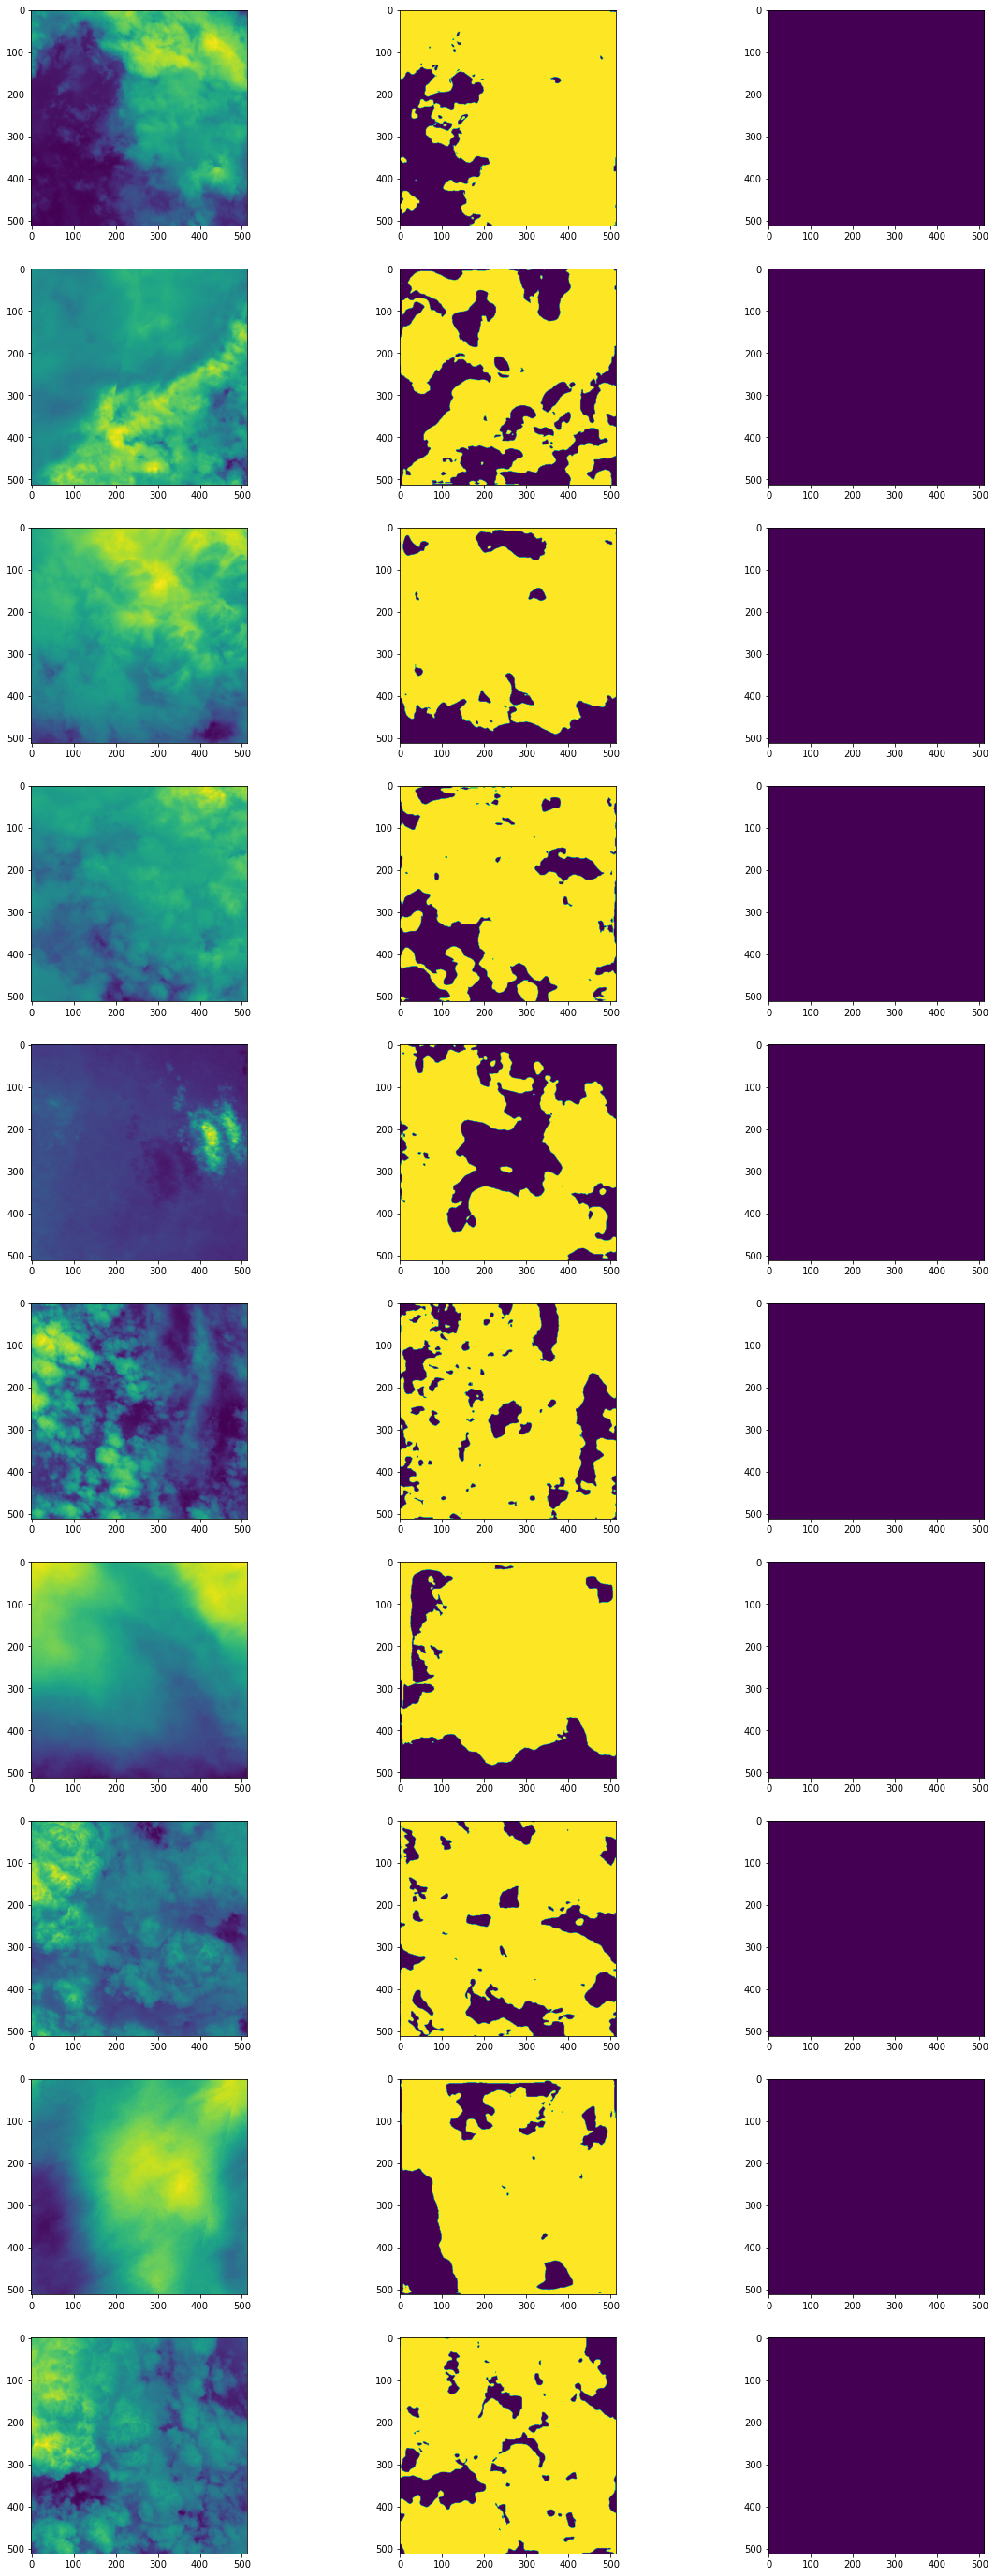

In [31]:
fig, axes = plt.subplots(nrows=10, ncols=3)
plt.gcf().set_size_inches((20,50))

for i in range(0, 10):
    chip = load_chip(train_meta_nomark.iloc[i])
    axes[i, 0].imshow(chip['image'][0])
    axes[i, 1].imshow(chip['label'])
    axes[i, 2].imshow(chip['old_label'])

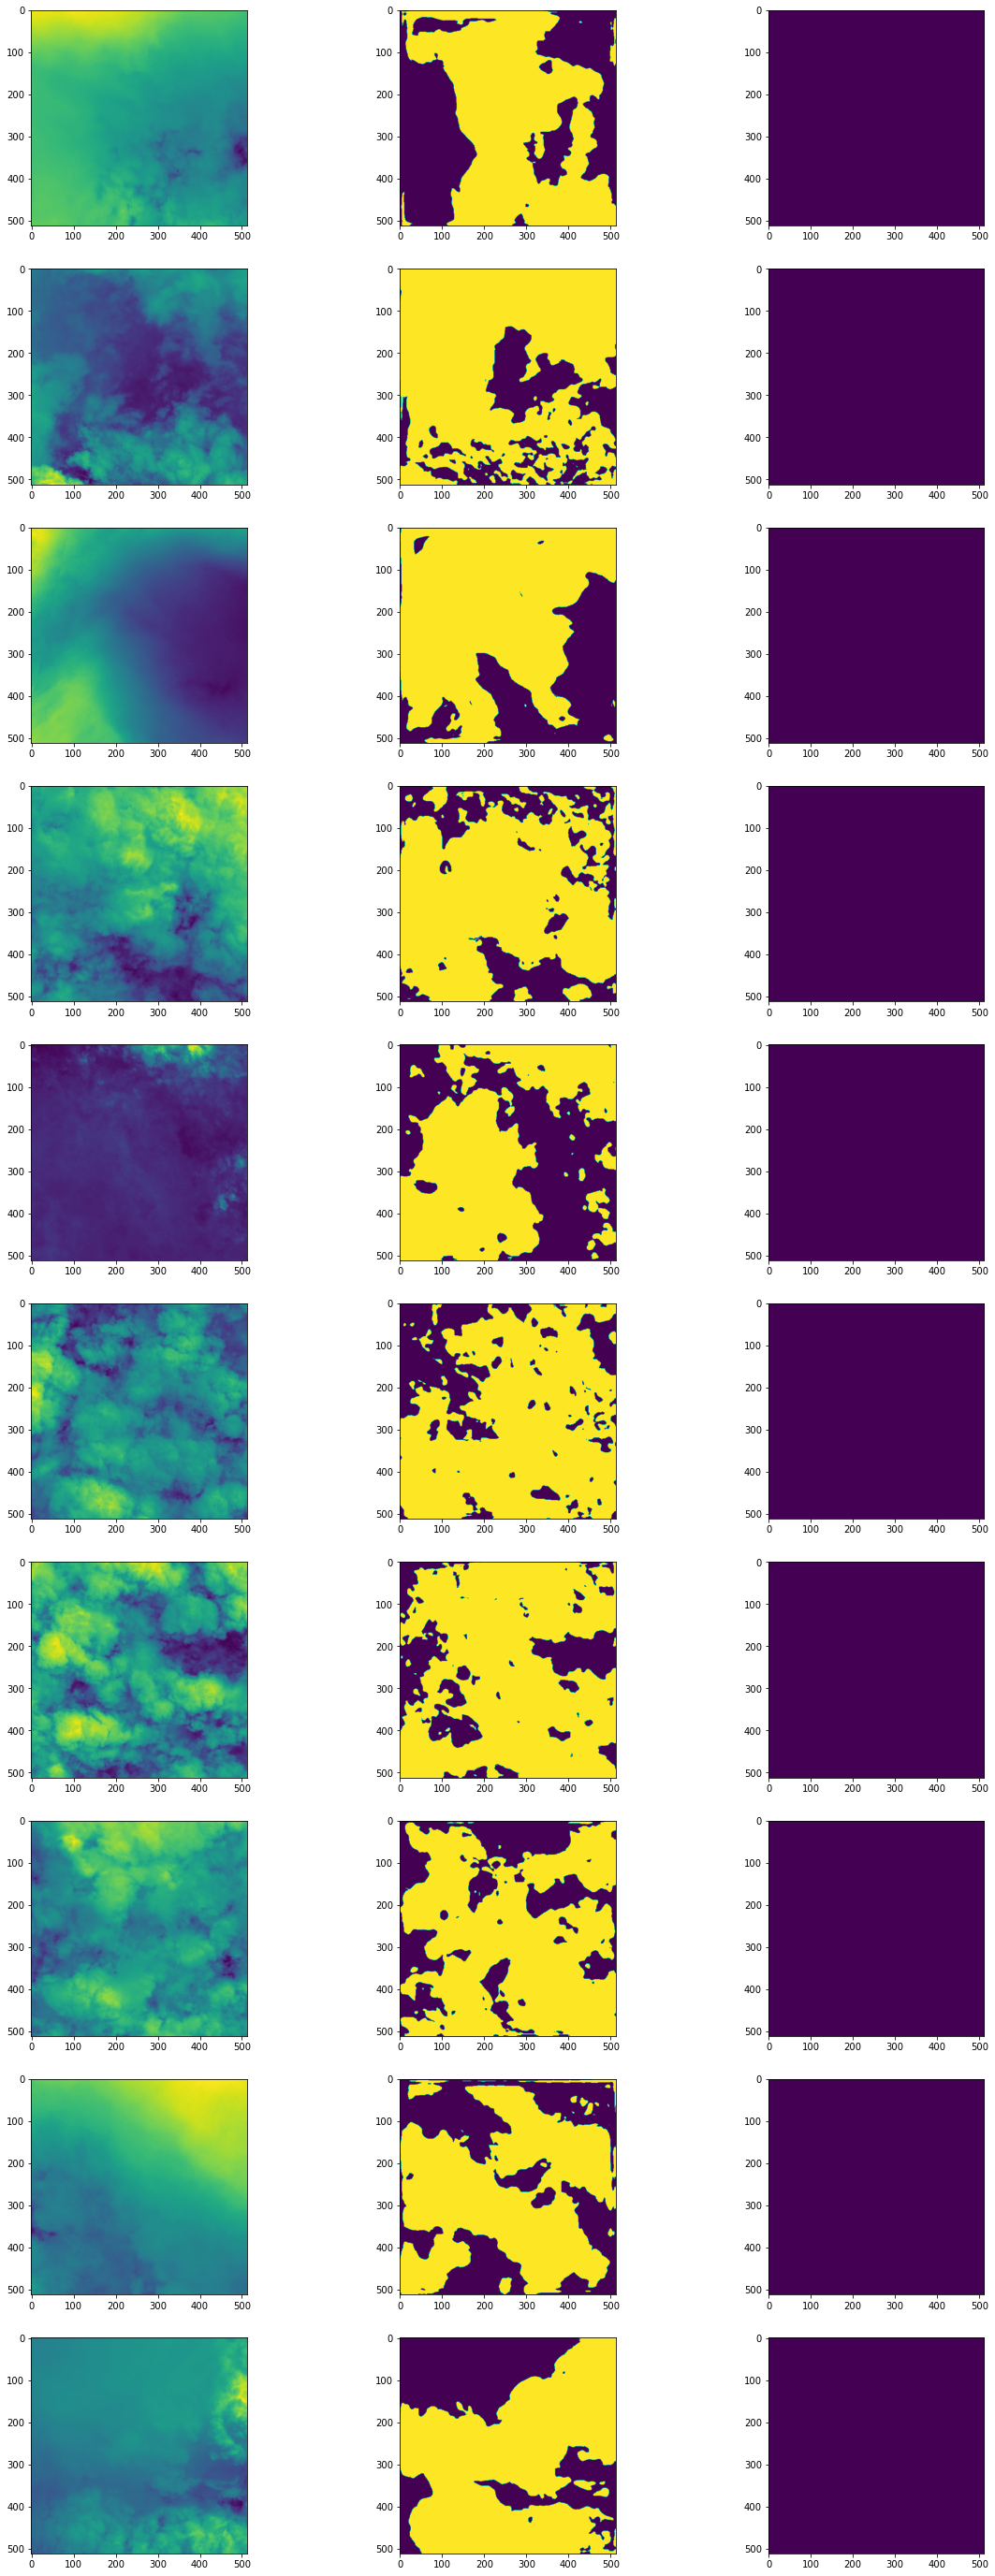

In [30]:
fig, axes = plt.subplots(nrows=10, ncols=3)
plt.gcf().set_size_inches((20,50))

for i in range(10, 20):
    chip = load_chip(train_meta_nomark.iloc[i])
    axes[i-10, 0].imshow(chip['image'][0])
    axes[i-10, 1].imshow(chip['label'])
    axes[i-10, 2].imshow(chip['old_label'])

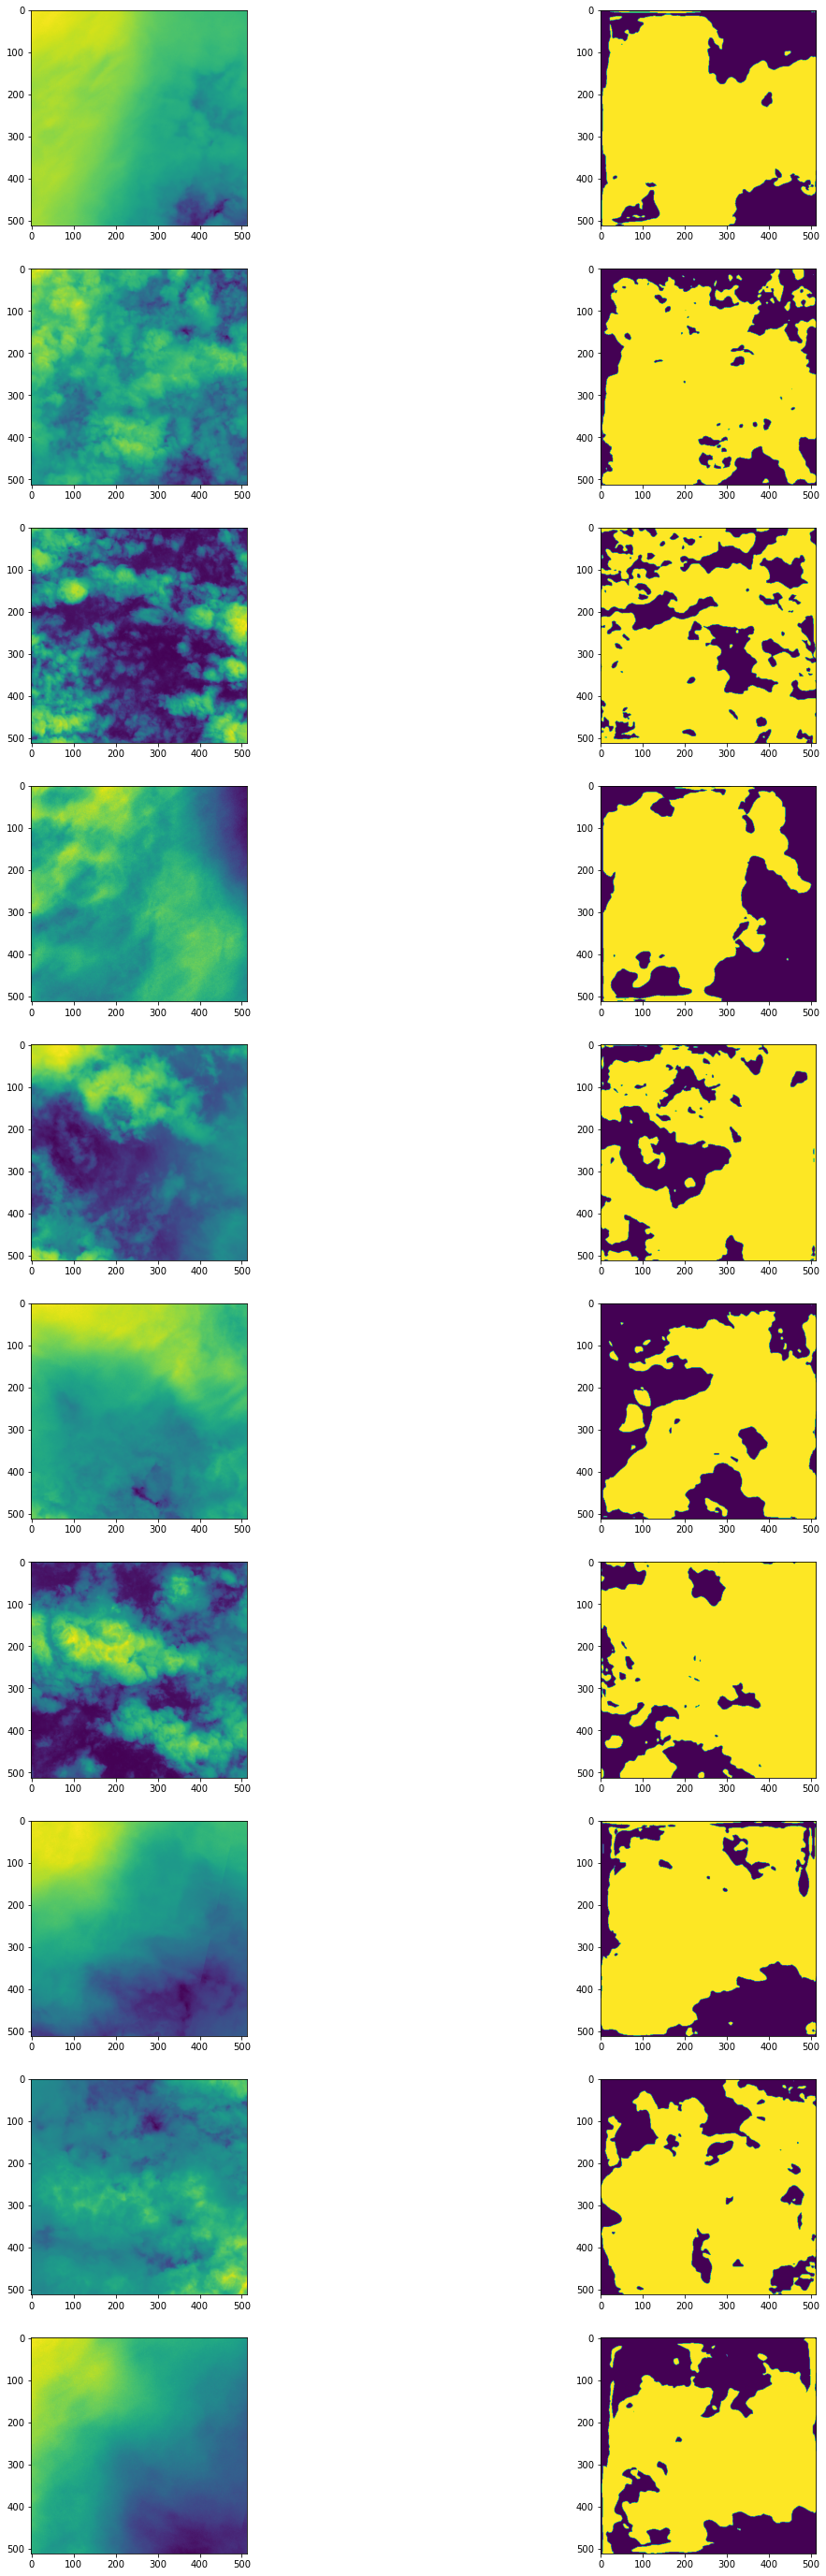

In [20]:
fig, axes = plt.subplots(nrows=10, ncols=2)
plt.gcf().set_size_inches((20,50))

for i in range(20, 30):
    chip = load_chip(train_meta_nomark.iloc[i])
    axes[i-20, 0].imshow(chip['image'][0])
    axes[i-20, 1].imshow(chip['label'])